In [1]:
using Distributions
using StatsPlots
default(fmt=:png)

safediv(x, y) = x==0 ? zero(x/y) : x/y

function pvalue(k, n, p)
    bin = Binomial(n, p)
    μ, σ = mean(bin), std(bin)
    z = (k - μ)/σ
    2ccdf(Normal(), abs(z))
end

function power(n, p0, p1; α=0.05)
    bin1 = Binomial(n, p1)
    μ1, σ1 = mean(bin1), std(bin1)
    a, b = max(0, floor(Int, μ1 - 6σ1)), max(n, ceil(Int, μ1 + 6σ1))
    sum(k -> (pvalue(k, n, p0) < α) * pdf(bin1, k), a:b)
end

[ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
[ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


power (generic function with 1 method)

In [2]:
[[m, power(2^m, 1/6, 1/5)] for m in 4:12] |> stack |> adjoint

9×2 adjoint(::Matrix{Float64}) with eltype Float64:
  4.0  0.0816879
  5.0  0.0969629
  6.0  0.127421
  7.0  0.19492
  8.0  0.299418
  9.0  0.535287
 10.0  0.788707
 11.0  0.974709
 12.0  0.999808

In [3]:
[[m, power(2^m, 1/6, 1/6 * 1.05)] for m in 4:16] |> stack |> adjoint

13×2 adjoint(::Matrix{Float64}) with eltype Float64:
  4.0  0.0467412
  5.0  0.0582249
  6.0  0.0539208
  7.0  0.0679687
  8.0  0.0652383
  9.0  0.0905605
 10.0  0.108879
 11.0  0.175927
 12.0  0.299973
 13.0  0.523135
 14.0  0.809879
 15.0  0.979994
 16.0  0.999896

In [4]:
[[m, power(2^m, 1/6, 1/6 * 1.1)] for m in 4:16] |> stack |> adjoint

13×2 adjoint(::Matrix{Float64}) with eltype Float64:
  4.0  0.0570078
  5.0  0.0675446
  6.0  0.0716326
  7.0  0.0949811
  8.0  0.114924
  9.0  0.192184
 10.0  0.290744
 11.0  0.51966
 12.0  0.806327
 13.0  0.978236
 14.0  0.999866
 15.0  1.0
 16.0  1.0

In [5]:
[[m, power(2^m, 1/6, 1/6+0.005)] for m in 4:16] |> stack |> adjoint

13×2 adjoint(::Matrix{Float64}) with eltype Float64:
  4.0  0.0430063
  5.0  0.0555122
  6.0  0.0486857
  7.0  0.0615333
  8.0  0.0533884
  9.0  0.0672699
 10.0  0.0703799
 11.0  0.0955815
 12.0  0.139892
 13.0  0.230444
 14.0  0.40183
 15.0  0.678233
 16.0  0.927897

In [6]:
[[m, power(2^m, 1/6, 1/6+0.01)] for m in 4:16] |> stack |> adjoint

13×2 adjoint(::Matrix{Float64}) with eltype Float64:
  4.0  0.0486874
  5.0  0.0597992
  6.0  0.0569313
  7.0  0.0721223
  8.0  0.0728523
  9.0  0.105917
 10.0  0.135645
 11.0  0.231108
 12.0  0.403438
 13.0  0.675052
 14.0  0.924559
 15.0  0.997766
 16.0  0.999999

In [7]:
[[m, power(2^m, 1/6, 1/6+0.02)] for m in 4:16] |> stack |> adjoint

13×2 adjoint(::Matrix{Float64}) with eltype Float64:
  4.0  0.0614953
  5.0  0.0722832
  6.0  0.080601
  7.0  0.110148
  8.0  0.143042
  9.0  0.24939
 10.0  0.391167
 11.0  0.669017
 12.0  0.920912
 13.0  0.997364
 14.0  0.999999
 15.0  1.0
 16.0  1.0

In [8]:
[[m, power(2^m, 1/6, 1/6+0.03)] for m in 4:16] |> stack |> adjoint

13×2 adjoint(::Matrix{Float64}) with eltype Float64:
  4.0  0.0762993
  5.0  0.0899396
  6.0  0.114073
  7.0  0.170252
  8.0  0.254439
  9.0  0.459935
 10.0  0.703946
 11.0  0.942996
 12.0  0.998747
 13.0  1.0
 14.0  1.0
 15.0  1.0
 16.0  1.0

[(k, pvalue(k, n, p0)) for k = 189:190] = [(189, 0.05808628474163453), (190, 0.047714880237351105)]


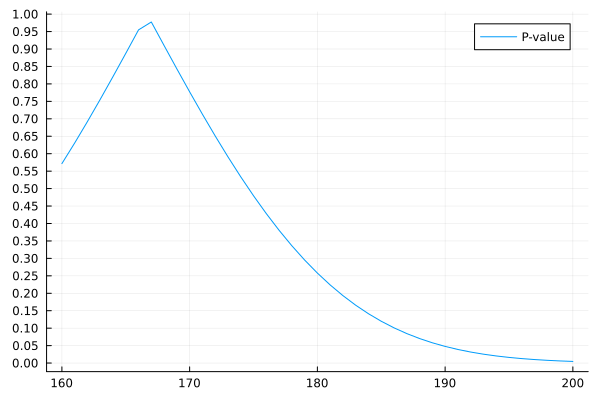

In [9]:
n = 1000
p0 = 1/6
ks = 160:200

@show [(k, pvalue(k, n, p0)) for k in 189:190]

plot(ks, pvalue.(ks, n, p0); label="P-value")
plot!(ytick=0:0.05:1)

[(k, pvalue(k, n, p0)) for k = 365:366] = [(365, 0.057433119632003427), (366, 0.04999579029644073)]


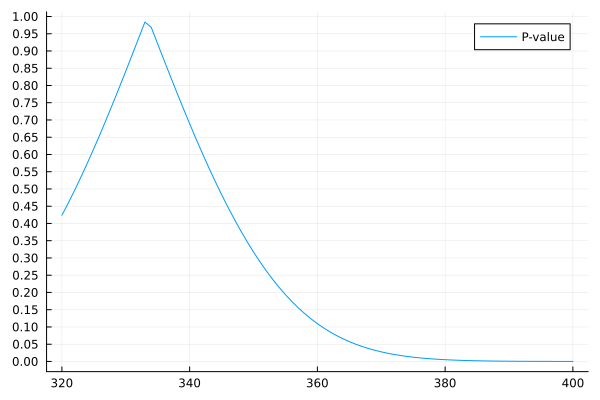

In [10]:
n = 2000
p0 = 1/6
ks = 320:400

@show [(k, pvalue(k, n, p0)) for k in 365:366]

plot(ks, pvalue.(ks, n, p0); label="P-value")
plot!(ytick=0:0.05:1)

[(k, pvalue(k, n, p0)) for k = 712:713] = [(712, 0.05443856343856675), (713, 0.04932670419490333)]


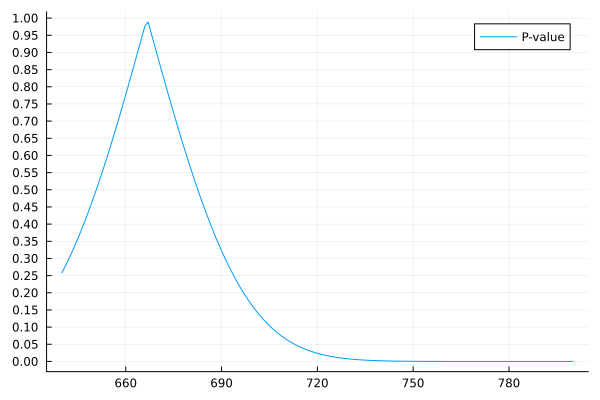

In [11]:
n = 4000
p0 = 1/6
ks = 640:800

@show [(k, pvalue(k, n, p0)) for k in 712:713]

plot(ks, pvalue.(ks, n, p0); label="P-value")
plot!(ytick=0:0.05:1)